1. Importamos las librerias que vamos a utilizar

In [106]:
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sb

2. Definimos los dataframes a partir de los archivos csv con cotizaciones historicas


In [107]:
sp = pd.read_csv("spy.csv")
nq = pd.read_csv("nq.csv")
dj = pd.read_csv("dia.csv")
rs = pd.read_csv("rusell.csv")

3. Añadimos una columna con el numero de cada mes con el que agruparemos luego

In [108]:
sp['month_num'] = pd.DatetimeIndex(sp["Date"]).month

nq['month_num'] = pd.DatetimeIndex(nq["Date"]).month

dj['month_num'] = pd.DatetimeIndex(dj["Date"]).month

rs['month_num'] = pd.DatetimeIndex(rs["Date"]).month

4. Añadimos una columna con el rendimiento continuo mensual de cada indice

    r = ln (Pi / Pj)

In [111]:
sp["S&P500"] = np.log(sp["Close"]/(sp["Close"].shift(1)))

nq["NASDAQ"] = np.log(nq["Close"]/(nq["Close"].shift(1)))

dj["DOW_JONES"] = np.log(dj["Close"]/(dj["Close"].shift(1)))

rs["RUSELL2000"] = np.log(rs["Close"]/(rs["Close"].shift(1)))

5. Obtenemos el promedio mensual agrupado por mes de cada indice

In [113]:
mr_sp = pd.DataFrame(sp.groupby('month_num')['S&P500'].mean())
mr_nq = pd.DataFrame(nq.groupby('month_num')['NASDAQ'].mean())
mr_dj = pd.DataFrame(dj.groupby('month_num')['DOW_JONES'].mean())
mr_rs = pd.DataFrame(rs.groupby('month_num')['RUSELL2000'].mean())

6. Damos formato y redondeamos a dos decimales

In [114]:
mr_sp['S&P500'] = round(mr_sp['S&P500']*100,2)
mr_nq['NASDAQ'] = round(mr_nq['NASDAQ']*100,2)
mr_dj['DOW_JONES'] = round(mr_dj['DOW_JONES']*100,2)
mr_rs['RUSELL2000'] = round(mr_rs['RUSELL2000']*100,2)

7. Unimos los datos en un unico dataframe y lo trasponemos para una mejor visualización

In [115]:
dff = mr_sp.merge(mr_nq,on='month_num').merge(mr_dj,on='month_num').merge(mr_rs,on='month_num')

dfft = dff.transpose()

dfft

month_num,1,2,3,4,5,6,7,8,9,10,11,12
S&P500,0.36,-0.15,0.68,1.91,0.62,-0.20,1.03,-0.07,-0.82,1.50,1.96,0.65
NASDAQ,1.76,0.51,0.61,0.99,1.05,0.91,0.82,0.22,-0.89,0.61,1.62,1.78
DOW_JONES,-0.77,-0.47,0.92,2.27,-0.26,-0.54,1.01,-0.50,-1.17,1.76,2.11,1.05
RUSELL2000,0.28,1.00,0.68,1.22,0.91,0.61,-0.38,-0.52,-0.28,-0.05,1.66,2.62


8. Graficamos en heatmap de seaborn

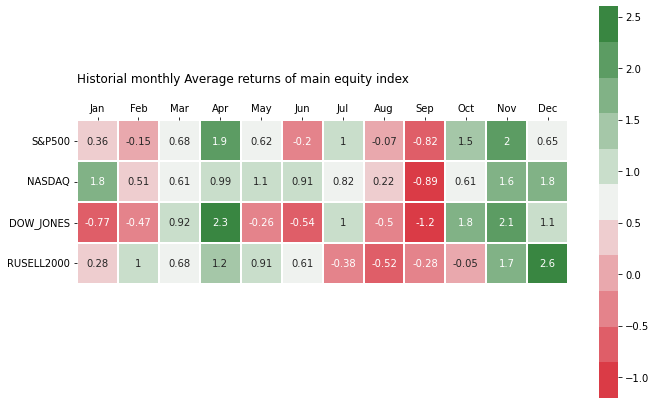

In [117]:
# figure
fig, ax = plt.subplots(figsize=(11, 9))
# plot heatmap
sb.heatmap(dfft, cmap=sb.diverging_palette(10, 130, n=11), vmin= -1.2, vmax=2.6, square=True,
           linewidth=0.3, annot=True , cbar_kws={"shrink": .8})
# xticks
ax.xaxis.tick_top()
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels=xticks_labels)
# axis labels
plt.xlabel('')
plt.ylabel('')
# title
title = 'Historial monthly Average returns of main equity index \n'
plt.title(title, loc='left')
plt.show()